In [26]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
# from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

Link how to make a pipeline with many transformations
https://stackoverflow.com/questions/65327433/machine-learning-classification-using-categorical-and-text-data-as-input

In [27]:
contex_data= pd.read_csv('mx-train-data-contextual.csv')
contex_data.head()

,tweet:text,tweet:id,account:id,account:name,account:created_at,account:verified,tweet:retweets_count,tweet:favorites_count,account:followers_count,account:friends_count,account:listed_count,account:user_favorites,account:user_statuses,account:default_profile,account:default_profile_image,tweet:datetime,tweet:is_reply,tweet:is_quote
0,Soy el Clint Eastwood de los Puentes de Madiso...,916185531444215808,854551632645832704,not_luz,Wed Apr 19 04:26:00 +0000 2017,0,0,0,1,120,0,18,75,1,0,2017-10-06 06:17:07+00:00,0,0
1,"Actualmente ya pasó de moda la pucha joto, aho...",920509390687473664,720706496879722496,l3orrego,Thu Apr 14 20:13:13 +0000 2016,0,0,3,289,240,2,14228,7557,1,0,2017-10-18 04:38:35+00:00,0,0
2,¿Es cierto esto? Y no me refiero a lo que dijo...,907905338761990145,150543906,Cinnamoon,Tue Jun 01 05:46:36 +0000 2010,0,0,0,491,1467,5,9978,14606,0,0,2017-09-13 09:54:35+00:00,1,0
3,Vuela pega y esquiva... la neta está de la ver...,928132991121068032,45450273,DonGarcia_,Sun Jun 07 23:31:00 +0000 2009,0,0,3,1968,985,20,15028,47431,0,0,2017-11-08 05:32:03+00:00,0,0
4,Mejor puto disfraz de la noche!!!! 👊👊👊Por terc...,927062194478559232,177383115,becerrilxa,Thu Aug 12 00:24:57 +0000 2010,0,0,1,180,206,4,112,20774,0,0,2017-11-05 06:37:05+00:00,0,0


In [28]:
# Vulgarity label for each sample in the data files mx-train-data-contextual.csv and mx-train-data-non-contextual.csv, this information will be only available for trial and training data
vul= pd.read_csv('mx-train-vulgarity-label.csv')
vul.head()


,vulgar tag
0,1
1,1
2,0
3,1
4,1


In [29]:
# ground truth labels for samples in mx-train-data-contextual.csv and mx-train-data-non-contextual.csv
vul_true= pd.read_csv('mx-train-outputs.sol')
vul_true.head()

,0
0,1
1,0
2,0
3,0
4,1


In [30]:
contex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   tweet:text                     5060 non-null   object
 1   tweet:id                       5060 non-null   int64 
 2   account:id                     5060 non-null   int64 
 3   account:name                   5060 non-null   object
 4   account:created_at             5060 non-null   object
 5   account:verified               5060 non-null   int64 
 6   tweet:retweets_count           5060 non-null   int64 
 7   tweet:favorites_count          5060 non-null   int64 
 8   account:followers_count        5060 non-null   int64 
 9   account:friends_count          5060 non-null   int64 
 10  account:listed_count           5060 non-null   int64 
 11  account:user_favorites         5060 non-null   int64 
 12  account:user_statuses          5060 non-null   int64 
 13  acc

In [31]:
contex_data['length']=contex_data['tweet:text'].apply(len)

In [32]:
contex_data['label']=vul

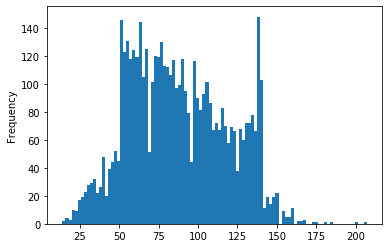

In [33]:
contex_data['length'].plot.hist(bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bfbaea850>,
      dtype=object)

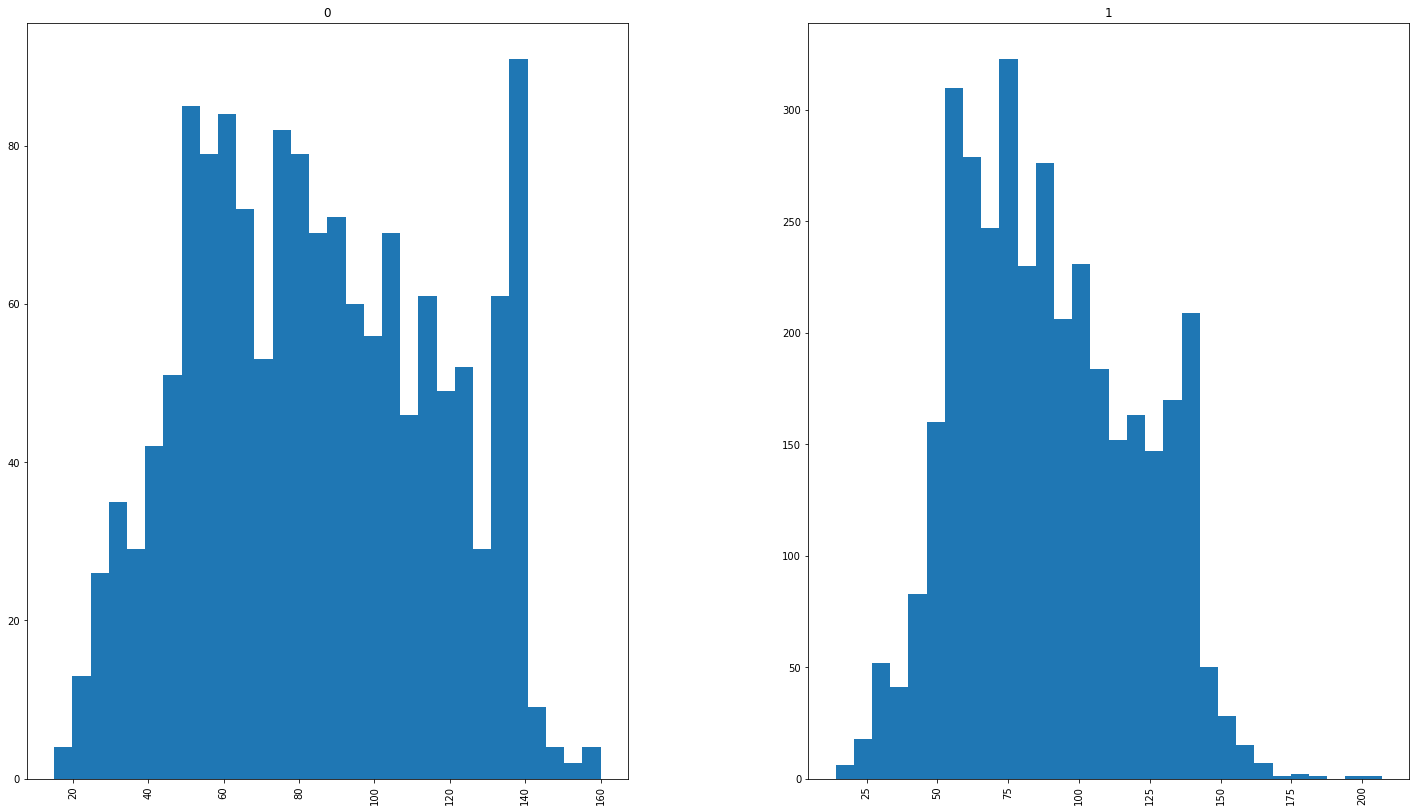

In [34]:
contex_data.hist(column='length', by='label', bins=30, figsize=(24,14))

In [35]:
import string
from nltk.corpus import stopwords

In [36]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('spanish')]


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC


In [88]:
# pipeline for text data
text_features = 'tweet:text'
text_transformer = Pipeline(steps=[
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('vectorizer', TfidfVectorizer(stop_words="english"))
])

# pipeline for categorical data
categorical_features = ['account:name',]
categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# you can add other transformations for other data types

# combine preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_features),
        ('cat', categorical_transformer, categorical_features)], 
    remainder='passthrough')


# add model to be part of pipeline
clf_pipe =  Pipeline(steps=[('preprocessor', preprocessor),
                   ("model", SVC())
])

# ...

## you can just use preprocessor by itself
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)
# clf_s= SVC().fit(X_train, y_train)
# clf_s.score(X_test, y_test)

## or better, you can use the whole.
# clf_pipe.fit(X_train, y_train) 
# clf_pipe.score(X_test, y_test)



In [89]:
X=contex_data.drop(columns=['tweet:id', 'account:id', 'account:created_at', 'tweet:datetime','label' ])
y=contex_data['label']

In [90]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(X, y, test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3542 1518 5060


In [91]:
msg_train = preprocessor.fit_transform(msg_train)
msg_test = preprocessor.transform(msg_test)


In [92]:
msg_train


<3542x14825 sparse matrix of type '<class 'numpy.float64'>'
	with 58733 stored elements in Compressed Sparse Row format>

In [93]:
clf_s= SVC(probability=True).fit(msg_train, label_train)
clf_s.score(msg_test, label_test)


0.7364953886693018

In [94]:
predictions = clf_s.predict(msg_test)

In [95]:
from sklearn.metrics import classification_report

print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.03      0.05       409
           1       0.74      1.00      0.85      1109

    accuracy                           0.74      1518
   macro avg       0.79      0.51      0.45      1518
weighted avg       0.77      0.74      0.63      1518



In [87]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

Now we are going to try with the whole data

In [97]:
contex_data_test = pd.read_csv('mx-test-data-contextual.csv')
contex_data_test.head()


,tweet:text,tweet:id,account:id,account:name,account:created_at,account:verified,tweet:retweets_count,tweet:favorites_count,account:followers_count,account:friends_count,account:listed_count,account:user_favorites,account:user_statuses,account:default_profile,account:default_profile_image,tweet:datetime,tweet:is_reply,tweet:is_quote
0,"@USUARIO Si, y uno que era como de sopa de let...",9.052780e+17,1.274217e+08,walii_hm,Mon Mar 29 04:21:41 +0000 2010,0,0,1,1271,817,3,98251,43700,0,0,2017-09-06 03:54:28+00:00,1,0
1,"Verga, creo que van a matar a algunos periodis...",9.052040e+17,3.081048e+09,Chimi_19,Mon Mar 09 06:03:40 +0000 2015,0,0,0,84,717,0,2245,2431,0,0,2017-09-05 23:00:39+00:00,0,1
2,@USUARIO Que nivel de bancada está preparado ...,9.228000e+17,2.288574e+07,Pablo_Arreola,Thu Mar 05 05:32:43 +0000 2009,0,0,0,3832,2269,55,223207,259658,0,0,2017-10-24 12:19:32+00:00,1,0
3,"A San Martín, tirilín, tirilín, se lo llevó, t...",9.054360e+17,1.954311e+08,Emmanuel_Lazos,Sun Sep 26 17:53:09 +0000 2010,0,0,2,5105,5603,57,74924,74639,0,0,2017-09-06 14:22:20+00:00,0,0
4,BUENAS PUTAS NOCHES PINCHES RAMEROS DE MIERDA!...,9.176050e+17,1.647978e+08,Ruiz79Jorge,Fri Jul 09 19:52:12 +0000 2010,0,0,0,256,182,2,1641,17500,0,0,2017-10-10 04:19:17+00:00,0,0


In [98]:
contex_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet:text                     2183 non-null   object 
 1   tweet:id                       2183 non-null   float64
 2   account:id                     2183 non-null   float64
 3   account:name                   2183 non-null   object 
 4   account:created_at             2183 non-null   object 
 5   account:verified               2183 non-null   int64  
 6   tweet:retweets_count           2183 non-null   int64  
 7   tweet:favorites_count          2183 non-null   int64  
 8   account:followers_count        2183 non-null   int64  
 9   account:friends_count          2183 non-null   int64  
 10  account:listed_count           2183 non-null   int64  
 11  account:user_favorites         2183 non-null   int64  
 12  account:user_statuses          2183 non-null   i

In [99]:
contex_data_test['length']=contex_data['tweet:text'].apply(len)

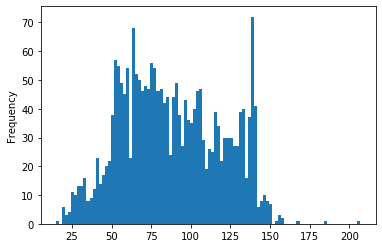

In [100]:
contex_data_test['length'].plot.hist(bins=100)

In [102]:
X_test=contex_data_test.drop(columns=['tweet:id', 'account:id', 'account:created_at', 'tweet:datetime' ])

In [103]:
X_test = preprocessor.transform(X_test)


In [104]:
predictions = clf_s.predict(X_test)

In [105]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
df_final = pd.DataFrame()

df_final['Pred']= list(predictions)

df_final.head()

,Pred
0,1
1,1
2,1
3,1
4,1


In [107]:
df_final.to_csv('Contextual_Mex.tsv', sep='\t', header=False, index=False)